# Supervised Parametric Learning
#### Step: 
* Predict
* Compare to truth pattern
* Learn the pattern

## Step: Predict

In [ ]:
weight = .1
def neural_network(input, weight):
  pred = input * weight
  return pred

In [ ]:
number_of_toes = [8.5, 9.5, 10, 9]
input = number_of_toes[0]
pred = neural_network(input, weight)
print(pred)

0.8500000000000001


In [ ]:
weights = [[0.1, 0.1, -0.3],
          [0.1, 0.2, 0.0],
          [0.0, 1.3, 0.1]]

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

input = np.array([toes[0], wlrec[0], nfans[0]])

In [ ]:
def w_sum(a, b):
  assert(len(a) == len(b))
  output = 0
  for i in range(len(a)):
    output+= (a[i] * b[i])
  return output

def vect_mat_mul(vect, matrix):
  output = [0] * len(vect)
  for i in range(len(vect)):
    output[i] = w_sum(vect, matrix[i])
  return output

In [ ]:
#import numpy as np
def neural_network(input, weights):
  #pred = input.dot(weights)
  pred = vect_mat_mul(input, weights)
  return pred

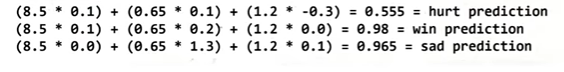

In [ ]:
pred = neural_network(input, weights)
pred

[0.555, 0.9800000000000001, 0.9650000000000001]

## (not) Deep Learning

In [6]:
import numpy as np

weights = np.array([0.7, 0.2, -0.5])
alpha = 0.1
streetLights = np.array([[0, 0, 1],
                         [0, 1, 1],
                         [0, 0, 1],
                         [1, 1, 1],
                         [0, 1, 1],
                         [1, 0, 1]])
walk_vs_stop = np.array([0, 1, 0, 1, 1, 0])

In [7]:
for i in range(40):
  error_for_all_lights = 0
  for row in range(len(walk_vs_stop)):
    input = streetLights[row]
    goal_pred = walk_vs_stop[row]
    pred = input.dot(weights)

    error = (pred - goal_pred) ** 2
    error_for_all_lights += error

    delta = pred - goal_pred
    weights = weights - (alpha * (input * delta))

    print('Prediction : ', pred)
  print('Weights : ', weights)
  print('Error : ', error)
  print()

Prediction :  -0.5
Prediction :  -0.25
Prediction :  -0.325
Prediction :  0.7324999999999999
Prediction :  0.08600000000000002
Prediction :  0.5524
Weights :  [ 0.67151  0.44315 -0.22959]
Error :  0.30514576

Prediction :  -0.22959000000000002
Prediction :  0.23651899999999998
Prediction :  -0.13028289999999998
Prediction :  1.0737534899999999
Prediction :  0.387492792
Prediction :  0.6007554128000001
Weights :  [ 0.60405911  0.57337347 -0.12345478]
Error :  0.36090706600849853

Prediction :  -0.12345477947999997
Prediction :  0.46226417026800004
Prediction :  -0.057335718558799965
Prediction :  1.17960401779028
Prediction :  0.539624104512224
Prediction :  0.5625737490078015
Weights :  [ 0.52984133  0.65522424 -0.07978233]
Error :  0.3164892230726929

Prediction :  -0.07978233383395053
Prediction :  0.583420142092394
Prediction :  -0.030146114659794873
Prediction :  1.1995920581800865
Prediction :  0.6298323135038775
Prediction :  0.4998081868599713
Weights :  [ 0.45990131  0.71393979

## Deep Learning

In [8]:
import numpy as np

np.random.seed(1)

def relu(x):
  return (x > 0) * x

def relu2deriv(output):
  return output > 0

In [10]:
streetLights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1]])
walk_vs_stop = np.array([[1,1,0,0]]).T
alpha = 0.2
hidden_size = 4

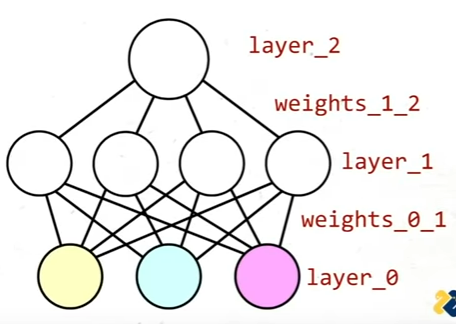

In [11]:
weights_0_1 = 2*np.random.random((3, hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size, 1)) - 1

In [15]:
for iter in range(60):
  layer_2_error = 0
  for i in range(len(streetLights)):
    layer_0 = streetLights[i:i+1] # same as input from before
    layer_1 = relu(np.dot(layer_0, weights_0_1)) # same as input AND prediction
    layer_2 = np.dot(layer_1, weights_1_2) # same as prediction from before
    
    layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)
    layer_2_delta = (layer_2 - walk_vs_stop[i:i+1])

    #backpropragation - Layer_2_delta to layer_1_delta
    #give us a weighting of how much each weight contributed to that error
    layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
    weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
    weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
  if(iter % 10 == 9):
    print('Error: ', layer_2_error)
    print('Weights: ', weights_1_2)
    print('Weights: ', weights_0_1)

Error:  0.6342311598444467
Weights:  [[-0.5910955 ]
 [ 1.02674678]
 [-0.94522481]
 [ 0.5210449 ]]
Weights:  [[-0.16595599  0.81650498 -0.99977125 -0.3866142 ]
 [-0.70648822 -0.86915809 -0.62747958  0.17907881]
 [-0.20646505 -0.0388002  -0.16161097  0.61842088]]
Error:  0.3583840767631751
Weights:  [[-0.5910955 ]
 [ 1.13892446]
 [-0.94522481]
 [ 0.69138066]]
Weights:  [[-0.16595599  0.90966162 -0.99977125 -0.65253984]
 [-0.70648822 -0.92794391 -0.62747958  0.45297798]
 [-0.20646505 -0.0339893  -0.16161097  0.40766861]]
Error:  0.08301831133032973
Weights:  [[-0.5910955 ]
 [ 1.13962133]
 [-0.94522481]
 [ 0.9498755 ]]
Weights:  [[-0.16595599  0.91056767 -0.99977125 -0.85636133]
 [-0.70648822 -0.92794391 -0.62747958  0.71297625]
 [-0.20646505 -0.03308325 -0.16161097  0.1721894 ]]
Error:  0.006467054957103672
Weights:  [[-0.5910955 ]
 [ 1.13962134]
 [-0.94522481]
 [ 1.07346157]]
Weights:  [[-0.16595599  0.91056768 -0.99977125 -0.89852267]
 [-0.70648822 -0.92794391 -0.62747958  0.85095193]
 